In [60]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist
from tensorflow.keras.models import load_model

In [2]:
# Displayinh the number of GPUs available
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [55]:
def detect_blink(eye_img):
    pred_B = model_b.predict(eye_img, verbose = 0)
    status = pred_B[0][0]
    status = status*100
    status = round(status,3)
    return  status

   
def crop_eye(img, eye_points):
    x1, y1 = np.amin(eye_points, axis=0)
    x2, y2 = np.amax(eye_points, axis=0)
    cx, cy = (x1 + x2) / 2, (y1 + y2) / 2

    w = (x2 - x1) * 1.2
    h = w * IMG_SIZE[1] / IMG_SIZE[0]

    margin_x, margin_y = w / 2, h / 2

    min_x, min_y = int(cx - margin_x), int(cy - margin_y)
    max_x, max_y = int(cx + margin_x), int(cy + margin_y)

    eye_rect = np.rint([min_x, min_y, max_x, max_y]).astype(int)

    eye_img = gray[eye_rect[1]:eye_rect[3], eye_rect[0]:eye_rect[2]]

    return eye_img, eye_rect

def get_eyes(shape):
    (leftEyeStart, leftEyeEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (rightEyeStart, rightEyeEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

    left_eye = shape[leftEyeStart:leftEyeEnd]
    right_eye = shape[rightEyeStart:rightEyeEnd]
    
    return left_eye, right_eye

def eye_aspect_ratio(eye):
    p2_minus_p6 = dist.euclidean(eye[1], eye[5])
    p3_minus_p5 = dist.euclidean(eye[2], eye[4])
    p1_minus_p4 = dist.euclidean(eye[0], eye[3])
    ear = (p2_minus_p6 + p3_minus_p5) / (2.0 * p1_minus_p4)
    return ear

# load a test image, resize it, and convert it to grayscale
def load_image(path, show=False, gray_show=False):
    test_image = cv2.imread(path)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    
    test_image = imutils.resize(test_image, width=500)
    gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
    
    if show:
        plt.imshow(test_image)
        plt.show()
        if gray_show:
            plt.imshow(gray, cmap='gray')
            plt.show()
    return test_image, gray

def detect_faces(face_detector, gray, scale_factor, frame_num, show_multi_faces = False):
     # detect faces in the grayscale image
    if face_detector == 'dlib':
        rects = detector(gray, 1)
        if len(rects) == 0:
            print('No face detected', path)
            return False
        elif len(rects) > 1:
            print('more faces detected')
            return False
    elif face_detector == 'haar':
        detections = haar_cascade.detectMultiScale(gray, scaleFactor=scale_factor, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
        #Checking if there are more than 1 detected faces
        if len(detections) > 1:
            print('multiple faces', frame_num)
            # The predicted faces are boxes (same width and height). The last two values correspond to these.
            # So by just checking which is higher, I can find the correct face
            if detections[0][2] > detections[1][2]:
                face = detections[0]
                other = detections[1]
            else:
                face = detections[1]
                other = detections[0]
            if show_multi_faces:
                print('largest and chosen face')
                fX, fY, fW, fH = face[0],face[1], face[2], face[3]
                plt.imshow(gray[fY:fY + fH, fX:fX + fW], cmap='gray')
                plt.show()
                print('not chosen face')
                fX, fY, fW, fH = other[0], other[1], other[2], other[3]
                plt.imshow(gray[fY:fY + fH, fX:fX + fW], cmap='gray')
                plt.show()
        elif len(detections) == 1:
            face = detections[0]
        # if no face detected
        elif len(detections) == 0:
            print('No face detected', path)
            return False
        fX, fY, fW, fH = face[0],face[1], face[2], face[3]    
        rects = [dlib.rectangle(fX, fY, fX + fW, fY + fH)]
    return rects

def get_landmarks(img, gray, rects, show=False):
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then convert the facial landmark (x, y)-coordinates to a NumPy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        if show: 
            # convert dlib's rectangle to a OpenCV-style bounding box [i.e., (x, y, w, h)], then draw the face bounding box
            (x, y, w, h) = face_utils.rect_to_bb(rect)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            # loop over the (x, y)-coordinates for the facial landmarks and draw them on the image
            for (x, y) in shape:
                cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
    if show:     
        # show the output image with the face detections + facial landmarks
        plt.imshow(img)
        plt.show()
    return shape

Frame: 120


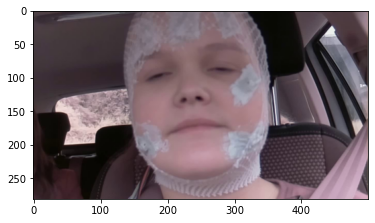

Frame: 121


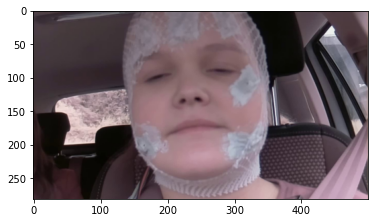

Frame: 122


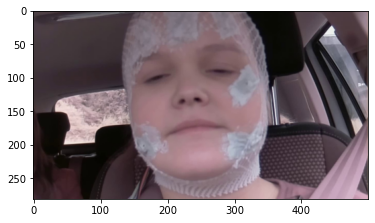

Frame: 123


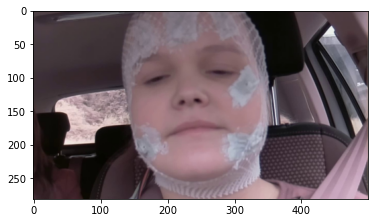

Frame: 124


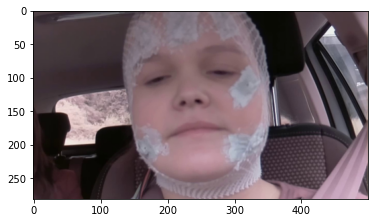

Frame: 125


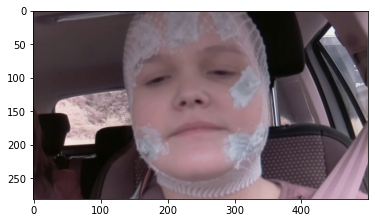

Frame: 126


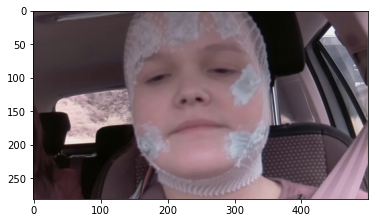

Frame: 127


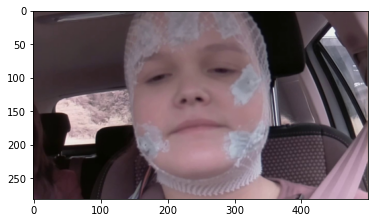

Frame: 128


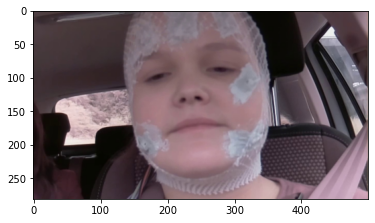

Frame: 129


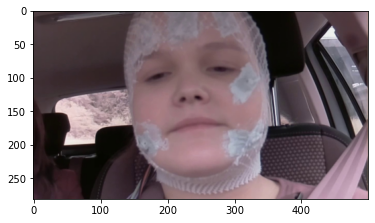

Frame: 130


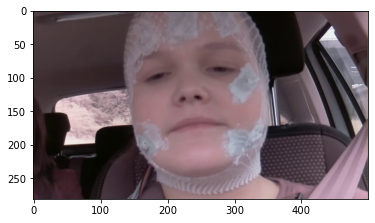

Frame: 131


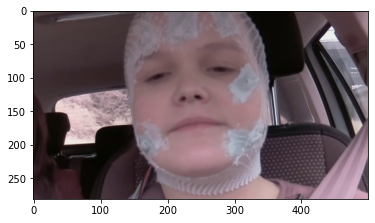

Frame: 132


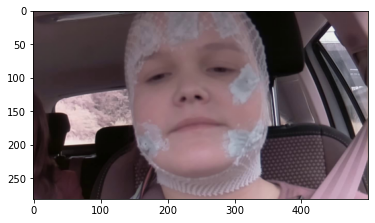

Frame: 133


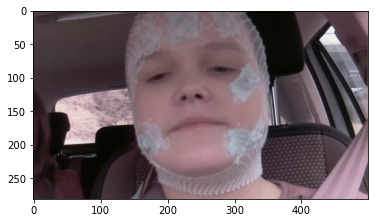

Frame: 134


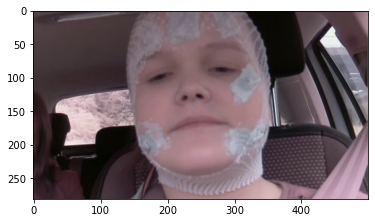

Frame: 135


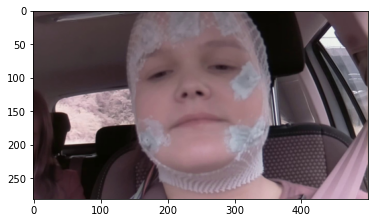

Frame: 136


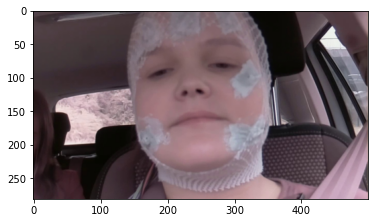

Frame: 137


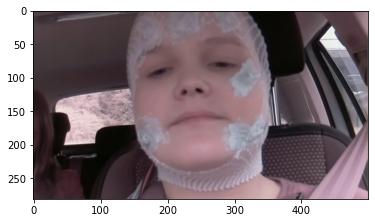

Frame: 138


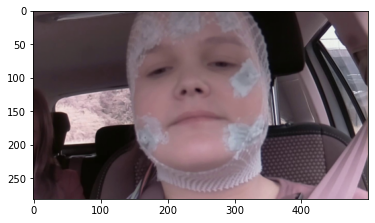

Frame: 139


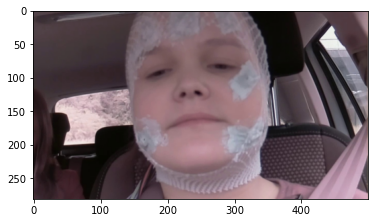

Frame: 140


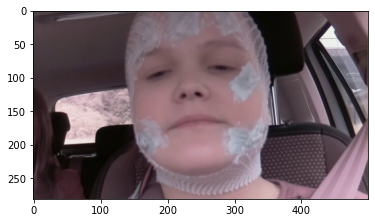

Frame: 141


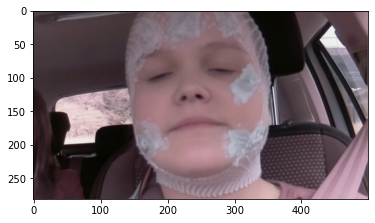

Frame: 142


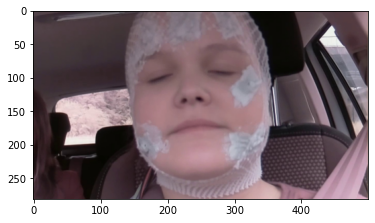

Frame: 143


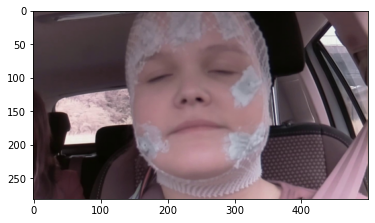

Frame: 144


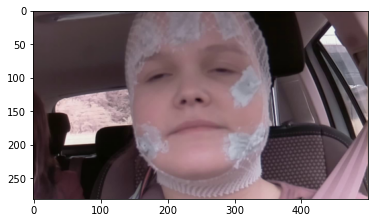

Frame: 145


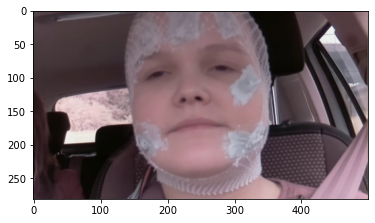

Frame: 146


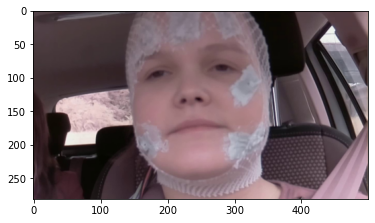

Frame: 147


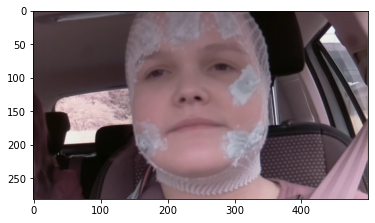

Frame: 148


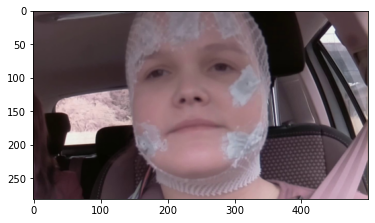

Frame: 149


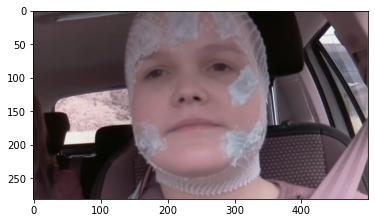

Frame: 150


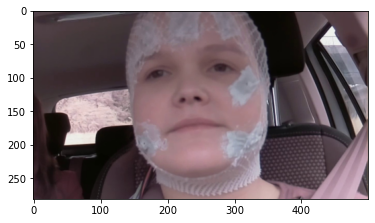

In [56]:
frame_start = 120
frame_end = 150
frames = range(frame_start, frame_end + 1)

# Just plotting sequence of frames
def plot_frames(frames):
    for frame in frames:
        path = '../sleepy_test_frames/frame' + str(frame) + '.jpg'
        print("Frame: " + str(frame))
        test_img, gray = load_image(path, show=True, gray_show=False)
        
plot_frames(frames)

In [35]:
IMG_SIZE = (1296,730)
B_SIZE = (34, 26)

#path = '../test_frames/frame848.jpg'

# haar Cascade path
cascade_path = '../models/haarcascade_frontalface_default.xml'
# create haar cascade
haar_cascade = cv2.CascadeClassifier(cascade_path)

# define pre-trained landmark detector path
ld_path = '../models/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(ld_path)
detector = dlib.get_frontal_face_detector()

model_b = load_model('../models/blinkdetection.h5')

face_detector = 'haar'

In [61]:
frame_start = 0
frame_end = 2774  # normal sleep: last frame is 2804    restricted sleep: last frame is 2774 
frames = range(frame_start, frame_end + 1)

scale_factor = 1.02

folder_path = '../sleepy_test_frames/frame'

# which eye openness calculation method to use: cnn or ear
eo_method = 'ear'

def calculate_eye_openness(frames, folder_path, scale_factor, eo_method):
    status_rates = []
    wrong_frames = []
    no_face_count = 0
    for frame in frames:
        if frame % 100 == 0:
            print(frame)
        path = folder_path + str(frame) + '.jpg'
        test_img, gray = load_image(path, show=False)
        rects = detect_faces(face_detector, gray, scale_factor, frame, show_multi_faces = False)
        
        if rects == False:
            no_face_count += 1
            # append eye opennes status from previous frame
            status_rates.append(status)
            wrong_frames.append(frame)
            continue
            
        shapes = get_landmarks(test_img, gray, rects, show=False)
        
        if eo_method == 'cnn':
            #~~~~~~~~~~~~~~~~~56,64 EYE IMAGE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
            eye_img_l, eye_rect_l = crop_eye(gray, eye_points=shapes[36:42])
            eye_img_r, eye_rect_r = crop_eye(gray, eye_points=shapes[42:48])
            #~~~~~~~~~~~~~~~~~FOR THE BLINK DETECTION~~~~~~~~~~~~~~~~~~~~~~~
            eye_blink_left = cv2.resize(eye_img_l.copy(), B_SIZE)
            eye_blink_right = cv2.resize(eye_img_r.copy(), B_SIZE)
            eye_blink_left_i = eye_blink_left.reshape((1, B_SIZE[1], B_SIZE[0], 1)).astype(np.float32) / 255.
            eye_blink_right_i = eye_blink_right.reshape((1, B_SIZE[1], B_SIZE[0], 1)).astype(np.float32) / 255.

            status_l = detect_blink(eye_blink_left_i)
            status_r = detect_blink(eye_blink_right_i)

            status = (status_l + status_r) / 2
        
        elif eo_method == 'ear':
            left_eye, right_eye = get_eyes(shapes)
            left_ear = eye_aspect_ratio(left_eye)
            right_ear = eye_aspect_ratio(right_eye)
            
            status = (left_ear + right_ear) / 2
        
        status_rates.append(status)

    print(no_face_count)
    return status_rates, wrong_frames

status_rates, wrong_frames = calculate_eye_openness(frames, folder_path, scale_factor, eo_method)

0
multiple faces 0
multiple faces 2
multiple faces 3
multiple faces 6
multiple faces 7
multiple faces 10
multiple faces 80
multiple faces 82
100
200
multiple faces 269
multiple faces 275
multiple faces 282
multiple faces 290
multiple faces 291
multiple faces 293
multiple faces 294
multiple faces 295
300
multiple faces 306
multiple faces 307
multiple faces 308
multiple faces 310
multiple faces 321
multiple faces 333
400
multiple faces 400
multiple faces 403
multiple faces 404
multiple faces 405
multiple faces 407
500
600
700
800
multiple faces 845
multiple faces 847
multiple faces 848
multiple faces 849
multiple faces 850
multiple faces 851
multiple faces 853
900
1000
1100
multiple faces 1137
multiple faces 1139
multiple faces 1142
1200
No face detected ../sleepy_test_frames/frame2774.jpg
No face detected ../sleepy_test_frames/frame2774.jpg
No face detected ../sleepy_test_frames/frame2774.jpg
No face detected ../sleepy_test_frames/frame2774.jpg
No face detected ../sleepy_test_frames/fra

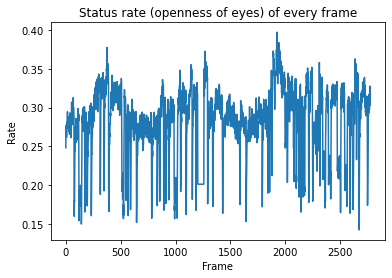

In [62]:
plt.title("Status rate (openness of eyes) of every frame")
plt.xlabel('Frame')
plt.ylabel('Rate')
plt.plot(frames, status_rates)
plt.show()

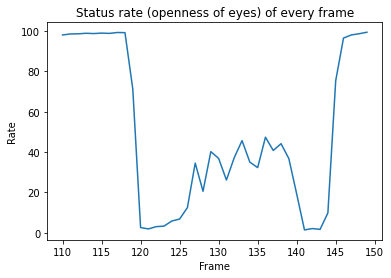

In [51]:
# look at the graph more in depth

# DONT change these parameters
frame_start = 0
frame_end = 2774  # normal sleep: last frame is 2804    restricted sleep: last frame is 2774 
frames = range(frame_start, frame_end + 1)

# CHANGE these parameter
frame_start = 110
frame_end = 150

plt.title("Status rate (openness of eyes) of every frame")
plt.xlabel('Frame')
plt.ylabel('Rate')
plt.plot(frames[frame_start:frame_end], status_rates[frame_start:frame_end])
plt.show()

In [42]:
# Finds eye-blinks given a sequence of values and a treshhold.
def find_blinks(values, treshhold):
    blink = False
    blinks = []
    blink_count = 0
    for i, val in enumerate(values):
        if val < treshhold:
            if blink == False:
                blink_count +=1
                start = i
            blink = True
        else:
            if blink == True:
                end = i - 1
                #calculate duration of blink, and include in tuple
                duration = end - start + 1
                blinks.append((start, end, duration))
                #print("Blinking period: " + str(start) + " - " + str(end))
            blink = False
    return blinks, blink_count

treshhold = 15
blinks, count = find_blinks(status_rates, treshhold)
print(blinks)
print(np.array(blinks)[:,2])
print(len(blinks))

[(76, 79, 4), (120, 126, 7), (141, 144, 4), (174, 175, 2), (194, 196, 3), (232, 233, 2), (524, 528, 5), (548, 550, 3), (569, 570, 2), (589, 591, 3), (644, 646, 3), (782, 784, 3), (832, 834, 3), (855, 857, 3), (892, 894, 3), (910, 913, 4), (938, 941, 4), (988, 995, 8), (997, 997, 1), (1012, 1016, 5), (1047, 1048, 2), (1096, 1098, 3), (1153, 1153, 1), (1261, 1268, 8), (1339, 1340, 2), (1428, 1430, 3), (1586, 1587, 2), (1643, 1645, 3), (1790, 1791, 2), (1842, 1842, 1), (1856, 1857, 2), (1878, 1878, 1), (1903, 1904, 2), (1999, 2001, 3), (2019, 2020, 2), (2100, 2101, 2), (2142, 2144, 3), (2160, 2161, 2), (2175, 2176, 2), (2214, 2215, 2), (2249, 2251, 3), (2300, 2309, 10), (2314, 2315, 2), (2362, 2366, 5), (2414, 2415, 2), (2503, 2505, 3), (2560, 2563, 4), (2590, 2592, 3), (2619, 2620, 2), (2649, 2649, 1), (2672, 2674, 3), (2749, 2751, 3)]
[ 4  7  4  2  3  2  5  3  2  3  3  3  3  3  3  4  4  8  1  5  2  3  1  8
  2  3  2  3  2  1  2  1  2  3  2  2  3  2  2  2  3 10  2  5  2  3  4  3
  2  1  

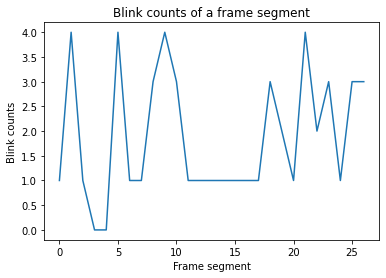

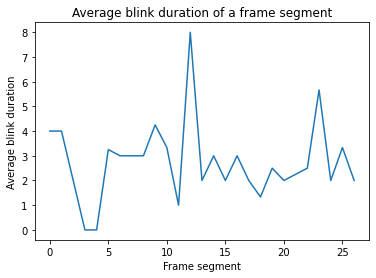

27
27


In [52]:
blink_starts = list(np.array(blinks)[:,0])
blink_durs = list(np.array(blinks)[:,2])

# Extracts features in a segment from given blinks
def blinks_segment(blink_starts, blink_durs, video_len, segment_len):
    # the amount of frames at the end that are not taken into account
    rest = video_len % segment_len
    num_frames = video_len - rest
    blink_counts = []
    average_durs = []
    
    blink_count = 0
    dur_count = 0
    
    # a blink is counted to a segment,when the blink starts in that segment
    for frame in range(num_frames):
        # only happens at the end of a segment
        if frame % segment_len == 0 and frame != 0:
            #print('new_segment', frame)
            blink_counts.append(blink_count)
            if dur_count > 0:
                avg_dur = dur_count / blink_count
            else:
                avg_dur = 0
            average_durs.append(avg_dur)
            blink_count = 0 
            dur_count = 0
        # happens when a blink starts
        if frame in blink_starts:
            frame_index = blink_starts.index(frame)
            blink_count += 1
            dur_count += blink_durs[frame_index]
            
    return blink_counts, average_durs
        
    
blink_counts, average_durs = blinks_segment(blink_starts, blink_durs, 2805, 100)

# Plotting blink counts
plt.title("Blink counts of a frame segment")
plt.xlabel('Frame segment')
plt.ylabel('Blink counts')
plt.plot(range(len(blink_counts)), blink_counts)
plt.show()

# Plotting average blink durations
plt.title("Average blink duration of a frame segment")
plt.xlabel('Frame segment')
plt.ylabel('Average blink duration')
plt.plot(range(len(average_durs)), average_durs)
plt.show()

print(len(blink_counts))
print(len(average_durs))